#📌 Extracción

In [154]:
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
Churn_de_Clientes = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(Churn_de_Clientes)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [155]:
'''Validando la estructura de los datos'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [156]:
'''Vamos a transformar las columnas que aparecen como diccionarios'''
dict_cols = ['customer', 'phone', 'account','internet']

for col in dict_cols:
    expanded = pd.json_normalize(df[col])
    df = pd.concat([df.drop(col, axis=1), expanded], axis=1)

In [157]:
'''Tomamos una muestra de los datos para validar que está correcto'''
df.sample(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4479,6137-NICCO,No,Female,0,Yes,Yes,6,Yes,Yes,Month-to-month,...,Mailed check,94.05,518.75,Fiber optic,No,Yes,Yes,No,Yes,No
3980,5443-SCMKX,No,Female,0,Yes,No,58,Yes,Yes,One year,...,Electronic check,94.30,5610.15,Fiber optic,No,Yes,Yes,No,No,Yes
2609,3640-PHQXK,Yes,Female,0,No,No,31,Yes,Yes,Month-to-month,...,Electronic check,89.90,2806.9,Fiber optic,No,No,Yes,No,No,Yes


In [158]:
columnas = list(df)
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   Contract          7267 non-null   object 
 10  PaperlessBilling  7267 non-null   object 
 11  PaymentMethod     7267 non-null   object 
 12  Charges.Monthly   7267 non-null   float64
 13  Charges.Total     7267 non-null   object 
 14  InternetService   7267 non-null   object 
 15  OnlineSecurity    7267 non-null   object 
 16  OnlineBackup      7267 non-null   object 


In [160]:
df.sample(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5396,7377-DMMRI,Yes,Male,0,No,No,2,Yes,No,Month-to-month,...,Electronic check,47.80,92.45,DSL,Yes,No,No,No,No,No
548,0781-LKXBR,Yes,Male,1,No,No,9,Yes,Yes,Month-to-month,...,Electronic check,100.50,918.6,Fiber optic,No,No,Yes,No,Yes,Yes
1081,1530-ZTDOZ,No,Female,0,Yes,No,49,No,No phone service,Month-to-month,...,Bank transfer (automatic),40.65,2070.75,DSL,Yes,No,No,No,Yes,No


In [161]:
'''Revisión de valores nulos'''
df.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
Contract,0


In [162]:
'''Revisión de duplicados'''
duplicados = df[df['customerID'].duplicated(keep=False)]
duplicados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


In [163]:
'''Cambiamos el tipo de variable, el nombre y borramos la antigua'''
df['ChargesTotal'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df.drop(columns=['Charges.Total'], inplace=True)

df['ChargesMonthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
df.drop(columns=['Charges.Monthly'], inplace=True)


In [164]:
df.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9


In [165]:
'''Ahora vamos a renombrar las columnas'''
df.rename(columns={
    'gender': 'Gender',
    'tenure': 'Tenure',
    'customerID': 'CustomerID'
}, inplace=True)

In [166]:
df.head(3)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9


In [167]:
'''Vamos a crear una nueva columna con el valor diario de los cargos'''
df['DailyCharges'] = df['ChargesMonthly'] / 30

In [168]:
df.sample(3)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
3472,4807-IZYOZ,No,Female,0,No,No,51,Yes,No,Two year,...,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1020.75,20.65,0.688333
3588,4945-RVMTE,No,Female,0,No,No,28,Yes,No,Month-to-month,...,DSL,No,No,Yes,No,Yes,No,1646.45,59.55,1.985000
5234,7137-NAXML,No,Male,0,No,No,23,Yes,No,One year,...,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,405.60,20.15,0.671667


In [169]:
'''Vamos a transformar las columnas binarias'''
bin_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Aplicar transformación a binario
for col in bin_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


df[bin_cols].head()

,Partner,Dependents,PhoneService,PaperlessBilling
0,1,1,1,1
1,0,0,1,0
2,0,0,1,1
3,1,0,1,1
4,1,0,1,1


In [170]:
'''Reemplazamos los valores de la columna MultipleLines'''
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['MultipleLines'].value_counts()


,count
MultipleLines,
No,4202
Yes,3065


In [171]:
''' Reemplazamos los valores de la columna MultipleLines'''
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0})

df[['MultipleLines']].head()

,MultipleLines
0,0
1,1
2,0
3,0
4,0


In [172]:
df.Contract.value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [173]:
'''Reemplazamos los valores de la columna Contract'''
contract_mapping = {
    'Month-to-month': 1,
    'One year': 2,
    'Two year': 3
}

df_contract = pd.DataFrame(list(contract_mapping.items()), columns=['Contract Type', 'Code'])
print(df_contract)


    Contract Type  Code
0  Month-to-month     1
1        One year     2
2        Two year     3


In [174]:
df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,No,Yes,No,Yes,Yes,No,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,No,No,No,No,No,Yes,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,No,No,Yes,No,No,No,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,DSL,Yes,No,No,Yes,No,No,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Fiber optic,No,No,No,No,No,Yes,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,DSL,No,Yes,No,No,No,No,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,DSL,Yes,No,Yes,Yes,No,Yes,4627.65,67.85,2.261667


In [175]:
'''Vamos a categorizar los valores binarios'''
colum_to_binary = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in colum_to_binary:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,0,1,0,1,1,0,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,0,0,0,0,0,1,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,DSL,1,0,0,1,0,0,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,DSL,0,1,0,0,0,0,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,DSL,1,0,1,1,0,1,4627.65,67.85,2.261667


In [176]:
'''Recorre cada valor de la columna Churn del DataFrame df. Si el valor es 'Yes' o 'No', lo deja igual. Si el valor es diferente de 'Yes' o 'No', lo reemplaza con 'N/A'.'''
df['Churn'] = df['Churn'].apply(lambda x: x if x == 'Yes' or x =='No' else 'N/A')
df


,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,0,1,0,1,1,0,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,0,0,0,0,0,1,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,DSL,1,0,0,1,0,0,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,DSL,0,1,0,0,0,0,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,DSL,1,0,1,1,0,1,4627.65,67.85,2.261667


In [177]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
N/A,224


In [178]:
df.to_json('Churn_de_Clientes.json', index= False)

#📊 Carga y análisis

In [179]:
df1=df.groupby('Churn').size().reset_index(name='Total')
df1 = df1.set_index('Churn')
df1


,Total
Churn,
N/A,224
No,5174
Yes,1869


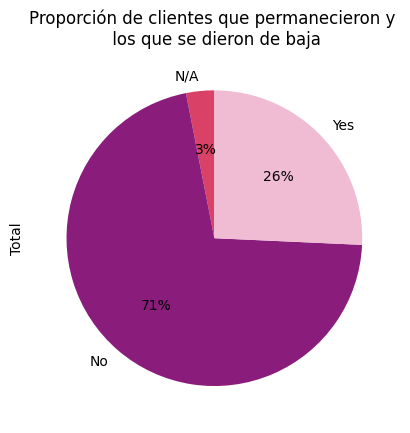

<Figure size 640x480 with 0 Axes>

In [180]:
df1['Total'].plot(kind='pie', autopct='%1.f%%', startangle=90, colors=['#DA4167', '#8A1C7C','#F0BCD4'])
plt.title('Proporción de clientes que permanecieron y \n los que se dieron de baja')
plt.show()

plt.savefig('grafico_churn.png', dpi=300, bbox_inches='tight')

In [181]:
cliente_evade = df.query('Churn == "Yes"')
cliente_evade

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
18,0022-TCJCI,Yes,Male,1,0,0,45,1,0,One year,...,DSL,1,0,1,0,0,1,2791.50,62.70,2.090000
19,0023-HGHWL,Yes,Male,1,0,0,1,0,0,Month-to-month,...,DSL,0,0,0,0,0,0,25.10,25.10,0.836667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9961-JBNMK,Yes,Male,1,0,0,21,1,0,Month-to-month,...,Fiber optic,0,0,1,0,1,1,2030.30,96.80,3.226667
7246,9965-YOKZB,Yes,Male,1,0,0,9,1,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,790.15,83.85,2.795000
7260,9985-MWVIX,Yes,Female,0,0,0,1,1,0,Month-to-month,...,Fiber optic,0,0,0,0,0,0,70.15,70.15,2.338333
7261,9986-BONCE,Yes,Female,0,0,0,4,1,0,Month-to-month,...,No,0,0,0,0,0,0,85.50,20.95,0.698333


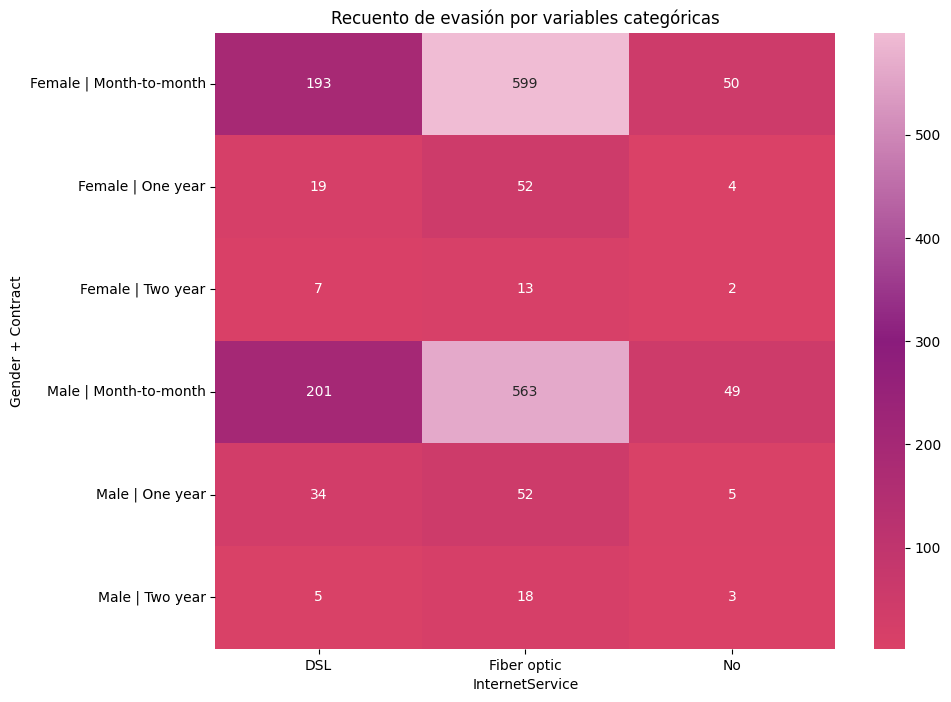

In [182]:
from matplotlib.colors import LinearSegmentedColormap
cliente_evade[['Gender','InternetService','Contract']].value_counts()
cliente_evade = cliente_evade.copy()

cliente_evade['Gender_Contract'] = cliente_evade['Gender'] + " | " + cliente_evade['Contract']

heatmap_data = cliente_evade.groupby(['Gender_Contract', 'InternetService']).size().unstack()

semaforo = LinearSegmentedColormap.from_list("semaforo", ["#DA4167", "#8A1C7C", "#F0BCD4"])

plt.figure(figsize=(10, 8))

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap=semaforo)
plt.title('Recuento de evasión por variables categóricas')
plt.xlabel('InternetService')
plt.ylabel('Gender + Contract')
plt.show()



In [183]:
Variables_numericas = [ 'Churn', 'ChargesMonthly', 'Tenure']

df_evasion_num = df[Variables_numericas].sort_values('Churn').set_index('Churn')
df_evasion_num


,ChargesMonthly,Tenure
Churn,,
N/A,20.65,7
N/A,60.15,51
N/A,106.30,41
N/A,70.30,1
N/A,103.30,19
...,...,...
Yes,82.05,48
Yes,69.85,1
Yes,69.55,1


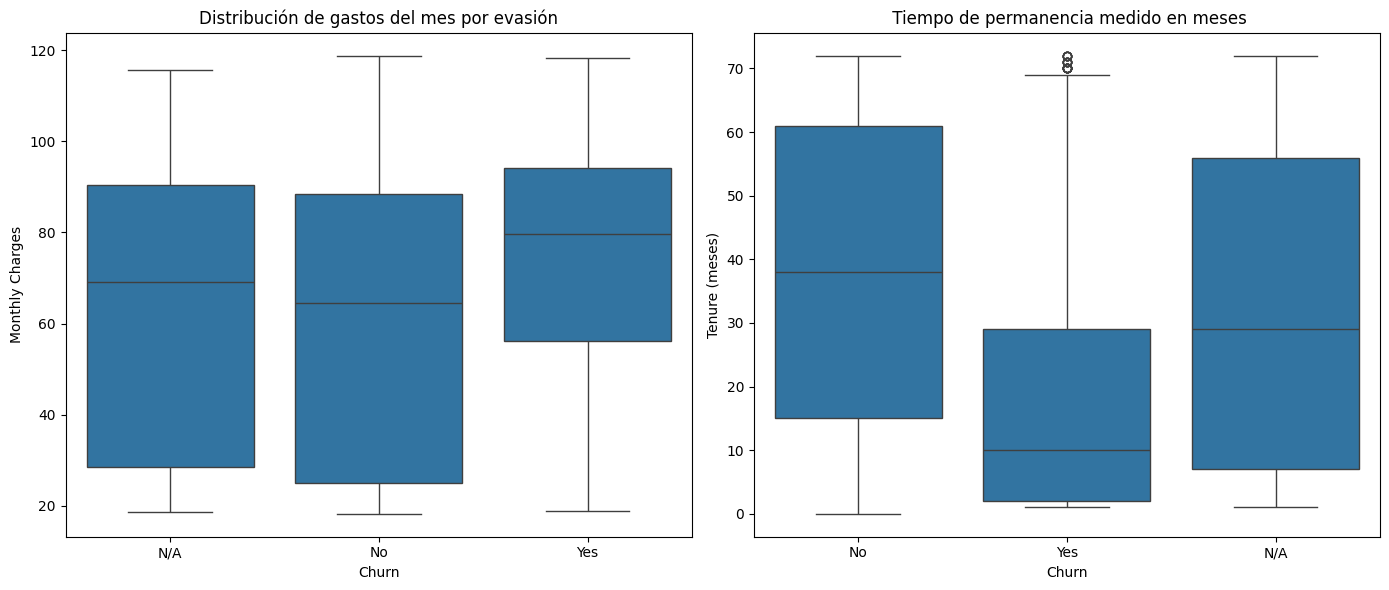

In [184]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.boxplot(data=df_evasion_num, x='Churn', y='ChargesMonthly')
plt.title('Distribución de gastos del mes por evasión')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='Tenure')
plt.title(' Tiempo de permanencia medido en meses')
plt.xlabel('Churn')
plt.ylabel('Tenure (meses)')

plt.tight_layout()
plt.show()


In [185]:
df.to_csv("datos_tratados.csv", index=False)

#📄Informe final

# Informe Final: Análisis de Churn de Clientes en TelecomX

## Introducción
Este informe resume el análisis que realicé sobre el **churn** (abandono) de clientes en la empresa **TelecomX**. Para ello trabajé con un dataset en formato JSON que procesé en Python usando principalmente la biblioteca **Pandas**.  

Mi objetivo fue identificar patrones de deserción, variables que influyen en el churn y algunos insights útiles que podrían orientar estrategias de retención. El proceso incluyó la extracción de los datos, su transformación, limpieza, exploración con visualizaciones y finalmente la interpretación de los hallazgos.  

---

## Extracción y Carga de Datos
- **Fuente**: Descargué los datos desde la URL pública:  
  `https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json`  
  usando `pd.read_json`.  
- **Estructura inicial**: El dataset contenía 7267 filas y varias columnas anidadas (customer, phone, internet, account).  
- **Primeras observaciones**: Los datos venían organizados, pero era claro que necesitaban normalización antes de analizarlos.  

---

## Transformación y Limpieza de Datos
En esta parte trabajé para dejar la información en un formato más amigable para el análisis:  

- **Normalización**: Aplané las columnas anidadas con `pd.json_normalize`, lo que me dejó 21 variables.  
- **Verificación**: Revisé con `df.info()` los tipos de datos y confirmé que no había valores nulos ni duplicados en `customerID`.  
- **Conversiones clave**:  
  - Convertí `Charges.Total` y `Charges.Monthly` a numérico y las renombré como `ChargesTotal` y `ChargesMonthly`.  
  - Creé una nueva variable: `DailyCharges = ChargesMonthly / 30`, para observar gasto diario promedio.  
  - Reemplacé respuestas binarias (“Yes/No”) por 1/0, lo que simplificó el análisis.  
  - Recodifiqué el tipo de contrato en una escala: 1 = mes a mes, 2 = un año, 3 = dos años.  
- **Churn**: Detecté valores distintos a “Yes/No” y los marqué como “N/A” (224 casos). El balance final fue: 5174 “No”, 1869 “Yes”, 224 “N/A”.  
- **Exportación**: Guardé los datos limpios como `datos_tratados.csv`.  

---

## Exploración de Datos
Revisé diferentes variables:  

- **Tenure**: Permanencia promedio de 32 meses; muchos clientes se van en los primeros meses.  
- **Cargos mensuales**: Promedio de 64.72 (mínimo 18.25, máximo 118.75).  
- **Churn**: Distribución de 71% clientes que permanecen, 26% que se van y 3% como N/A.  

Para contrastar, armé un sub-DataFrame con `Churn`, `ChargesMonthly` y `Tenure` que me ayudó a visualizar diferencias clave.  

---

## Hallazgos Principales
- **Proporción de churn**: 26% de abandono; es un nivel significativo.  
- **Tenure**: Clientes nuevos muestran más propensión al churn; los primeros meses son críticos.  
- **Cargos mensuales**: Posible relación entre costos altos y mayor deserción.  
- **Contratos**: Mayor churn en contratos mes a mes, menor en contratos anuales o bianuales.  
- **Servicios de Internet**: DSL y fibra óptica presentan más abandono, lo que sugiere revisar la satisfacción en esos servicios.  

---

## Visualizaciones
Generé gráficos para respaldar los hallazgos:  

- **Gráfico de pastel**: Proporción de churn (71% No, 26% Yes, 3% N/A) con colores personalizados (#DA4167, #8A1C7C, #F0BCD4).  
- **Heatmap**: Combinación de género, contrato y servicio de Internet para ubicar patrones de churn.  
- **Boxplots**:  
  - Comparación de `ChargesMonthly` entre clientes con y sin churn.  
  - Distribución de `Tenure` según churn, mostrando menor permanencia en quienes abandonan.  

---

## Conclusiones
- El churn afecta a poco más de una cuarta parte de los clientes.  
- Factores clave: baja permanencia, contratos cortos y cargos altos.  
- El servicio de Internet influye de manera notable en la deserción.  

---

## Recomendaciones
Aunque este análisis es exploratorio, propongo:  

- **Fidelización temprana**: Beneficios a clientes nuevos para que se queden más allá del primer año.  
- **Contratos más largos**: Incentivar planes de un año o más, con descuentos o promociones.  
- **Revisión de Internet**: Analizar la calidad de DSL y fibra óptica.  
- **Modelos predictivos**: Siguiente paso: aplicar regresión logística o árboles de decisión para cuantificar predictores de churn.  
- **Depuración de datos**: Revisar los 224 casos “N/A” para mejorar la consistencia.  

---

✍️ Este informe refleja el proceso de análisis y conclusiones. Para continuar, recomendaría llevar este trabajo hacia un modelo predictivo que cuantifique con precisión los factores más determinantes del churn.
